<a href="https://colab.research.google.com/github/LokeRuiKee/CompBioI/blob/main/Group%208%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#SECB3133-01 COMPUTATIONAL BIOLOGY I
#23/24 - 1
#GROUP 8

#TITLE: CLASSIFICATION OF THYROID GLAND USING NAIVE BAYES ALGORITHM

#GROUP MEMBERS:
# 1. AISYAH BINTI MOHD NADZRI A21EC0011
# 2. PUTERI NUR ELEEYA SYAFIKA BINTI MOHD ZABIDI
# 3. THUVAARITHA SIVARAJAH
# 4. MAATHUREE VEERABALAN
# 5. LOKE RUI KEE

# Pre-Analytics Data

In [ ]:
#2.0 Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from IPython.display import display


In [ ]:
import pandas as pd

# Raw URL for the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv"

# Read the dataset into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()


,107,10.1,2.2,0.9,2.7,1
0,113,9.9,3.1,2.0,5.9,1
1,127,12.9,2.4,1.4,0.6,1
2,109,5.3,1.6,1.4,1.5,1
3,105,7.3,1.5,1.5,-0.1,1
4,105,6.1,2.1,1.4,7.0,1


In [ ]:
#2.1.0 importing & exporting data

# Raw URL for the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv"

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url)

# Display the entire DataFrame
pd.set_option('display.max_rows', None)  # Set to None to display all rows
display(df)


,107,10.1,2.2,0.9,2.7,1
0,113,9.9,3.1,2.0,5.9,1
1,127,12.9,2.4,1.4,0.6,1
2,109,5.3,1.6,1.4,1.5,1
3,105,7.3,1.5,1.5,-0.1,1
4,105,6.1,2.1,1.4,7.0,1
5,110,10.4,1.6,1.6,2.7,1
6,114,9.9,2.4,1.5,5.7,1
7,106,9.4,2.2,1.5,0.0,1
8,107,13.0,1.1,0.9,3.1,1
9,106,4.2,1.2,1.6,1.4,1


In [ ]:
# 2.1.1 Data type and information each column
print ("Data Types and Information for Each Column:")
print(df.info())

# Statistical summary
df.describe()

Data Types and Information for Each Column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   107     214 non-null    int64  
 1   10.1    214 non-null    float64
 2   2.2     214 non-null    float64
 3   0.9     214 non-null    float64
 4   2.7     214 non-null    float64
 5   1       214 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 10.2 KB
None


,107,10.1,2.2,0.9,2.7,1
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,109.607477,9.803271,2.049533,2.889252,4.206075,1.443925
std,13.175063,4.708332,1.422777,6.130868,8.088786,0.727808
min,65.000000,0.500000,0.200000,0.100000,-0.700000,1.000000
25%,103.000000,7.100000,1.325000,1.000000,0.525000,1.000000
50%,110.000000,9.200000,1.700000,1.300000,2.000000,1.000000
75%,117.750000,11.300000,2.200000,1.700000,4.100000,2.000000
max,144.000000,25.300000,10.000000,56.400000,56.300000,3.000000


In [ ]:
#2.2 Data cleaning

#2.2.1 Identify missing values in the DataFrane
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Misssing values in the dataset:")
print(missing_values)

# Check if there are any missing values
if missing_values.sum() == 0:
  print("n\There are no missing values in the dataset.")
else:
  print("\nThere are missing values in the dataset.")

Misssing values in the dataset:
107     0
10.1    0
2.2     0
0.9     0
2.7     0
1       0
dtype: int64
n\There are no missing values in the dataset.


In [ ]:
#2.3 Data formatting

# Define your column names
column_names = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=column_names)

# Display the entire DataFrame
pd.set_option('display.max_rows', None)  # Set to None to display all rows
display(df)


,TSH-Value,TSH-Basal,T3-Serum,T4-Serum,T3-Resin,Target
0,107,10.1,2.2,0.9,2.7,1
1,113,9.9,3.1,2.0,5.9,1
2,127,12.9,2.4,1.4,0.6,1
3,109,5.3,1.6,1.4,1.5,1
4,105,7.3,1.5,1.5,-0.1,1
5,105,6.1,2.1,1.4,7.0,1
6,110,10.4,1.6,1.6,2.7,1
7,114,9.9,2.4,1.5,5.7,1
8,106,9.4,2.2,1.5,0.0,1
9,107,13.0,1.1,0.9,3.1,1


Standardized Dataset:


,TSH-Value,TSH-Basal,T3-Serum,T4-Serum,T3-Resin,Target
0,-0.197894,0.063022,0.105754,-0.324389,-0.186180,1
1,0.259603,0.020346,0.741266,-0.144173,0.211250,1
2,1.327096,0.660493,0.246979,-0.242472,-0.446993,1
3,-0.045395,-0.961213,-0.317920,-0.242472,-0.335216,1
4,-0.350393,-0.534448,-0.388533,-0.226089,-0.533931,1


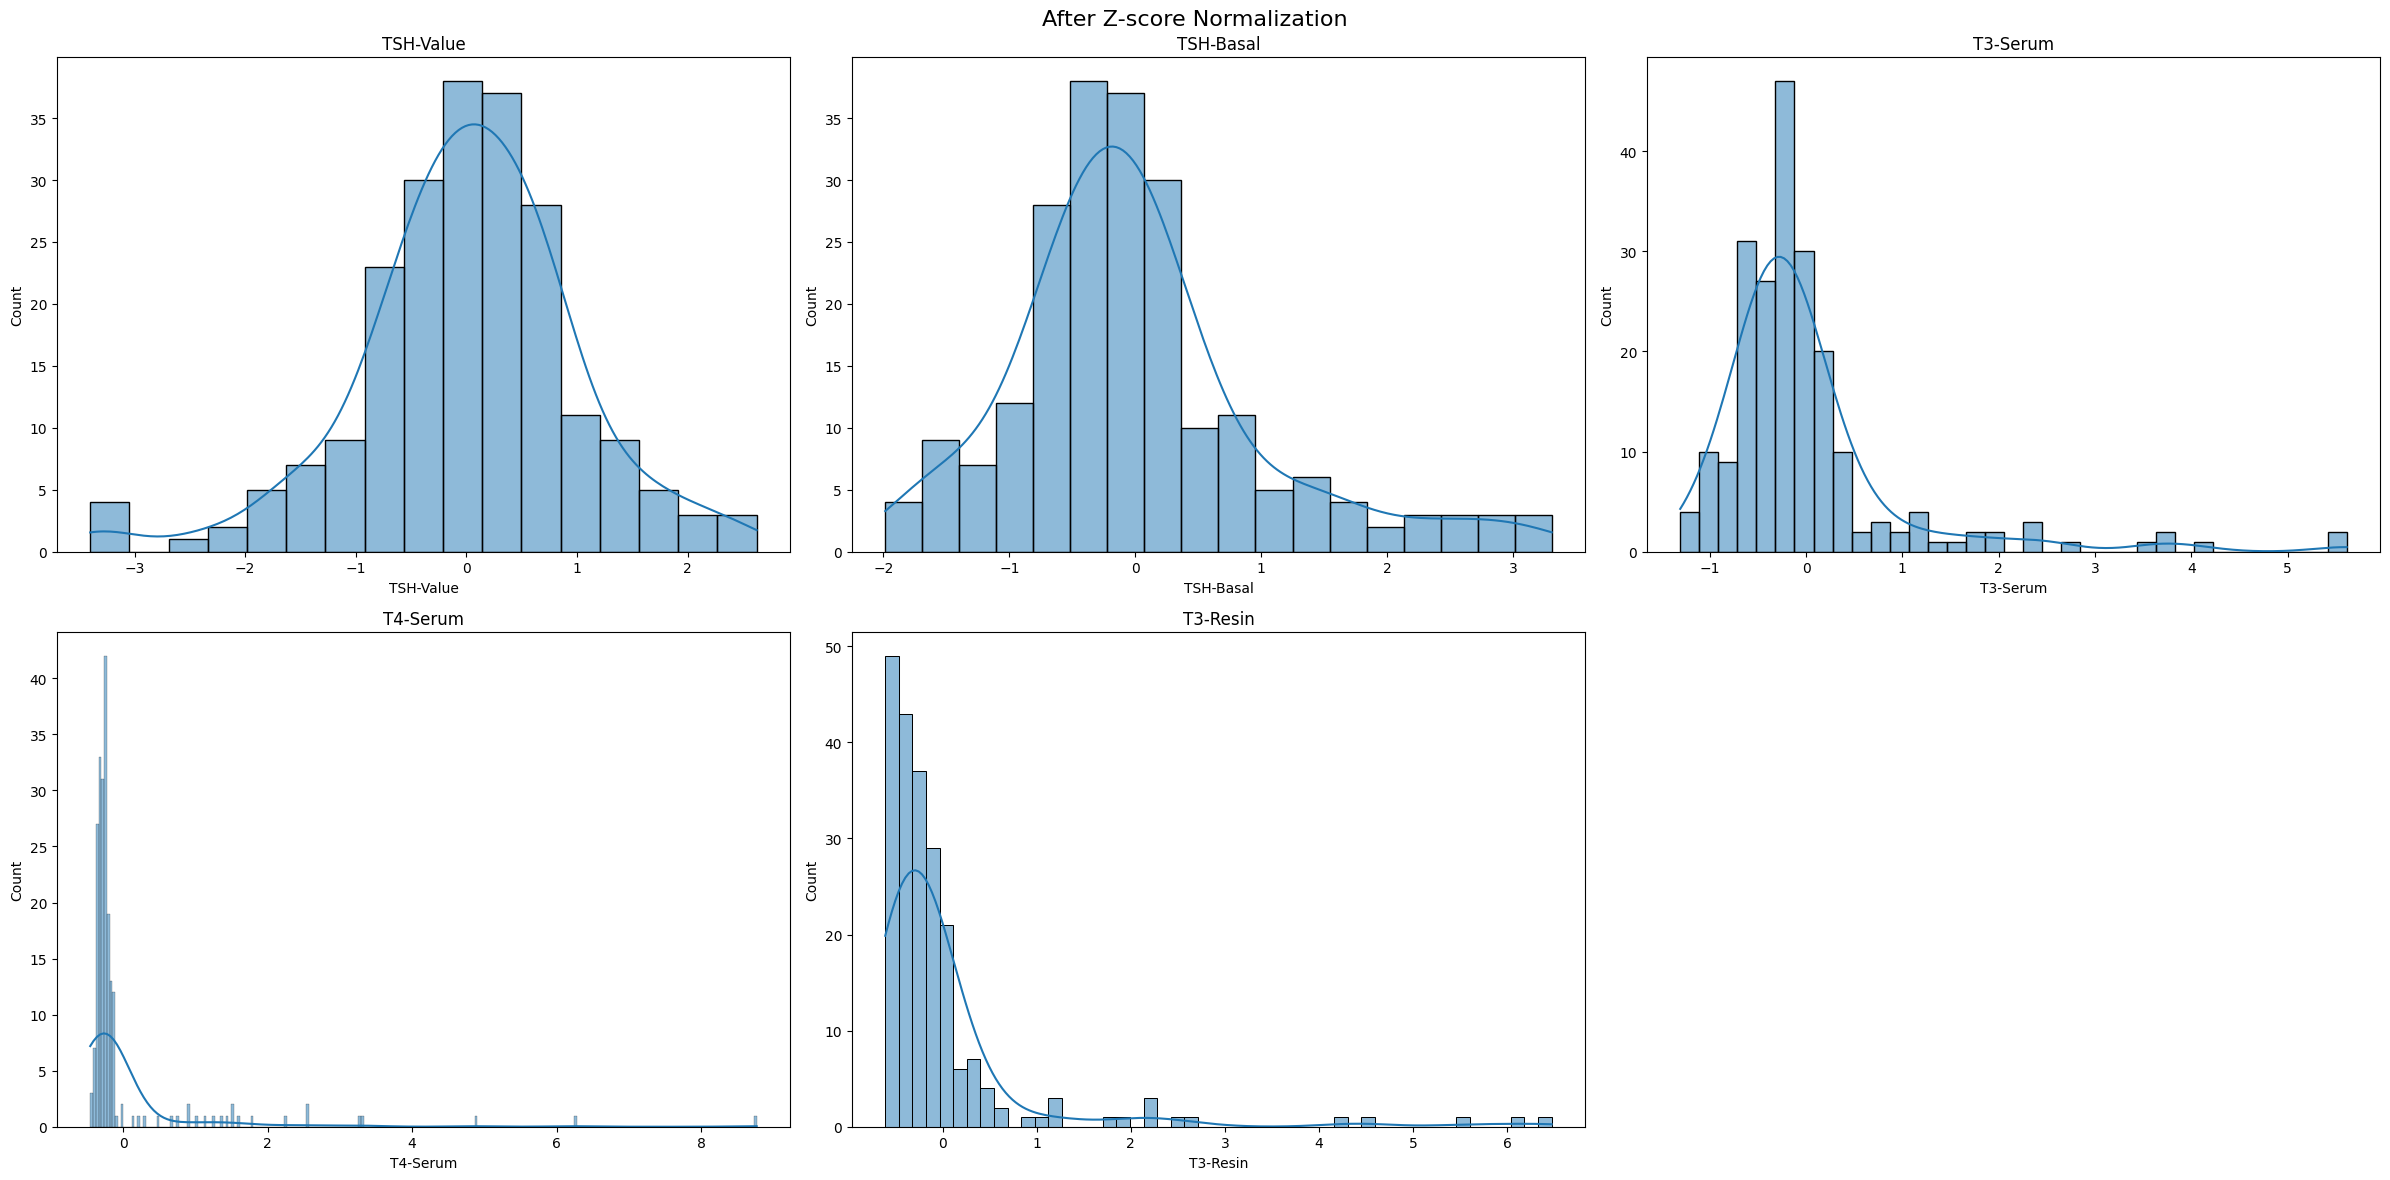

In [ ]:
# 2.4 Normalization

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from IPython.display import display

# Define your column names
column_names = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=column_names)

# Extract numerical columns that need normalization
numerical_columns = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin']

# Create a StandardScaler
scaler = StandardScaler()

# Normalize the selected numerical columns using Z-score normalization
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the standardized dataset
print("Standardized Dataset:")
display(df.head())

def plot_histograms(df, column_names, title):
    num_cols = len(column_names)
    rows = 2
    cols = (num_cols + 1) // rows

    plt.figure(figsize=(24, 12))
    plt.suptitle(title, fontsize=16)

    for i, col in enumerate(column_names, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(df[col], kde=True)
        plt.title(col)

    plt.tight_layout()

# Call the function to plot histograms
plot_histograms(df, numerical_columns, 'After Z-score Normalization')
plt.show()


In [ ]:
# 2.5 Data binning
# 2.5.1 Data binning (TSH-Value)

import pandas as pd

# Raw URL for the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv"

# Define your column names
column_names = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=column_names)

# Assuming df is your DataFrame
df['TSH-Category'] = pd.cut(df['TSH-Value'],
bins=[-float('inf'), 0.4, 4.0, float('inf')],
labels=['Low', 'Normal', 'High'], include_lowest=True)

# Display the updated DataFrame
display(df[['TSH-Value', 'TSH-Category']])

,TSH-Value,TSH-Category
0,107,High
1,113,High
2,127,High
3,109,High
4,105,High
5,105,High
6,110,High
7,114,High
8,106,High
9,107,High


In [ ]:
# 2.5.2 Data binning (TSH-Basal)

import pandas as pd

# Raw URL for the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv"

# Define your column names
column_names = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=column_names)

# Assuming df is your DataFrame
df['TSH-Category'] = pd.cut(df['TSH-Basal'],
bins=[-float('inf'), 0.4, 4.0, float('inf')],
labels=['Low', 'Normal', 'High'], include_lowest=True)

# Display the updated DataFrame
display(df[['TSH-Basal', 'TSH-Category']])

,TSH-Basal,TSH-Category
0,10.1,High
1,9.9,High
2,12.9,High
3,5.3,High
4,7.3,High
5,6.1,High
6,10.4,High
7,9.9,High
8,9.4,High
9,13.0,High


In [ ]:
# 2.5.3 Data binning (T3-Serum)

import pandas as pd

# Raw URL for the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv"

# Define your column names
column_names = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=column_names)

# Add a new column 'T3-Serum-Category' based on Normal range
df['T3-Serum-Category'] = pd.cut(df['T3-Serum'], bins=[-float('inf'), 0.9, 2.8, float('inf')],
labels=['Below Normal', 'Normal', 'Above Normal'],
include_lowest=True)

# Display the updated DataFrame
display(df[['T3-Serum', 'T3-Serum-Category']])

,T3-Serum,T3-Serum-Category
0,2.2,Normal
1,3.1,Above Normal
2,2.4,Normal
3,1.6,Normal
4,1.5,Normal
5,2.1,Normal
6,1.6,Normal
7,2.4,Normal
8,2.2,Normal
9,1.1,Normal


In [ ]:
# 2.5.3 Data binning (T4-Serum)

import pandas as pd

# Raw URL for the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv"

# Define your column names
column_names = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=column_names)

# Add a new column 'T4-Serum-Category' based on Normal range
df['T4-Serum-Category'] = pd.cut(df['T4-Serum'], bins=[-float('inf'), 5, 12, float('inf')],
labels=['Below Normal', 'Normal', 'Above Normal'],
include_lowest=True)

# Display the updated DataFrame
display(df[['T4-Serum', 'T4-Serum-Category']])

,T4-Serum,T4-Serum-Category
0,0.9,Below Normal
1,2.0,Below Normal
2,1.4,Below Normal
3,1.4,Below Normal
4,1.5,Below Normal
5,1.4,Below Normal
6,1.6,Below Normal
7,1.5,Below Normal
8,1.5,Below Normal
9,0.9,Below Normal


In [ ]:
# 2.5.3 Data binning (T3-Resin)

import pandas as pd

# Raw URL for the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv"

# Define your column names
column_names = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=column_names)

# Add a new column 'T3-Resin-Category' based on the normal range
df['T3-Resin-Category'] = pd.cut(df['T3-Resin'], bins=[-float('inf'), 24, 37, float('inf')],
labels=['Below Normal', 'Normal', 'Above Normal'],
include_lowest=True)


# Display the updated DataFrame
display(df[['T3-Resin', 'T3-Resin-Category']])

,T3-Resin,T3-Resin-Category
0,2.7,Below Normal
1,5.9,Below Normal
2,0.6,Below Normal
3,1.5,Below Normal
4,-0.1,Below Normal
5,7.0,Below Normal
6,2.7,Below Normal
7,5.7,Below Normal
8,0.0,Below Normal
9,3.1,Below Normal


In [ ]:
# 2.6 Variable indicator

import pandas as pd

# Assuming df is your DataFrame
# Add a new column 'Class' based on TSH-Value thresholds
df['Class'] = pd.cut(df['TSH-Value'], bins=[-float('inf'), 0.4, 4.0, float('inf')],
labels=['hypo', 'normal', 'hyper'],
include_lowest=True)

# Display the updated DataFrame
print(df)


     TSH-Value  TSH-Basal  T3-Serum  T4-Serum  T3-Resin  Target  \
0          107       10.1       2.2       0.9       2.7       1   
1          113        9.9       3.1       2.0       5.9       1   
2          127       12.9       2.4       1.4       0.6       1   
3          109        5.3       1.6       1.4       1.5       1   
4          105        7.3       1.5       1.5      -0.1       1   
5          105        6.1       2.1       1.4       7.0       1   
6          110       10.4       1.6       1.6       2.7       1   
7          114        9.9       2.4       1.5       5.7       1   
8          106        9.4       2.2       1.5       0.0       1   
9          107       13.0       1.1       0.9       3.1       1   
10         106        4.2       1.2       1.6       1.4       1   
11         110       11.3       2.3       0.9       3.3       1   
12         116        9.2       2.7       1.0       4.2       1   
13         112        8.1       1.9       3.7       2.0       

# Exploring Data

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Raw URL for the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv"

# Define your column names
column_names = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the DataFrame
print("Original DataFrame:")
print(df.head())

# Separate features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Heuristic feature selection using variance threshold
threshold = 0.1  # You can adjust this threshold based on your requirements

selector = VarianceThreshold(threshold=threshold)
X_selected = selector.fit_transform(X)

# Get selected feature names
selected_feature_names = X.columns[selector.get_support()]

# Display the selected features
print("\nSelected Features:")
print(X_selected[:5])  # Displaying the first 5 rows of the selected features
print("\nSelected Feature Names:")
print(selected_feature_names)


Original DataFrame:
   TSH-Value  TSH-Basal  T3-Serum  T4-Serum  T3-Resin  Target
0        107       10.1       2.2       0.9       2.7       1
1        113        9.9       3.1       2.0       5.9       1
2        127       12.9       2.4       1.4       0.6       1
3        109        5.3       1.6       1.4       1.5       1
4        105        7.3       1.5       1.5      -0.1       1

Selected Features:
[[ 1.07e+02  1.01e+01  2.20e+00  9.00e-01  2.70e+00]
 [ 1.13e+02  9.90e+00  3.10e+00  2.00e+00  5.90e+00]
 [ 1.27e+02  1.29e+01  2.40e+00  1.40e+00  6.00e-01]
 [ 1.09e+02  5.30e+00  1.60e+00  1.40e+00  1.50e+00]
 [ 1.05e+02  7.30e+00  1.50e+00  1.50e+00 -1.00e-01]]

Selected Feature Names:
Index(['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin'], dtype='object')


## Descriptive Statistics

In [ ]:
# 3.1 Descriptive Statistics
import pandas as pd

# GitHub raw URL for the CSV file
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv"

# Define your column names
column_names = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=column_names)

df.describe()

,TSH-Value,TSH-Basal,T3-Serum,T4-Serum,T3-Resin,Target
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,109.595349,9.804651,2.050233,2.880000,4.199070,1.441860
std,13.145447,4.697362,1.419486,6.118031,8.070519,0.726737
min,65.000000,0.500000,0.200000,0.100000,-0.700000,1.000000
25%,103.000000,7.100000,1.350000,1.000000,0.550000,1.000000
50%,110.000000,9.200000,1.700000,1.300000,2.000000,1.000000
75%,117.500000,11.300000,2.200000,1.700000,4.100000,2.000000
max,144.000000,25.300000,10.000000,56.400000,56.300000,3.000000


In [ ]:
# 3.2 Basic of Grouping
# Grouping by Target

import pandas as pd

# GitHub raw URL for the CSV file
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv"

# Assuming you have labeled the columns as follows
columns = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=columns)

# Create a DataFrame with the labeled columns
df_labeled = pd.DataFrame(df, columns=columns)

# Now you can use df_labeled for your operations
grouped_by_target = df_labeled.groupby('Target').mean()

# Display the grouped data
print(grouped_by_target)

         TSH-Value  TSH-Basal  T3-Serum   T4-Serum   T3-Resin
Target                                                       
1       110.513333   9.192667  1.731333   1.316667   2.516667
2        95.285714  17.745714  4.262857   0.974286  -0.020000
3       121.700000   3.600000  1.063333  12.920000  17.533333


In [ ]:
# 3.2 Basic of Grouping
# grouping by Target and TSH-Value

import pandas as pd

# GitHub raw URL for the CSV file
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv"

# Assuming you have labeled the columns as follows
columns = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=columns)

# Create a DataFrame with the labeled columns
df_labeled = pd.DataFrame(df, columns=columns)

# Grouping by 'Target' and 'TSH-Value', calculating mean for each group
grouped_by_multiple = df.groupby(['Target', 'TSH-Value']).mean()

# Displaying the grouped data
print(grouped_by_multiple)

                  TSH-Basal   T3-Serum   T4-Serum   T3-Resin
Target TSH-Value                                            
1      90          8.100000   1.600000   1.400000   1.100000
       91          8.000000   1.700000   2.100000   4.600000
       93          8.900000   1.500000   0.800000   2.700000
       94          7.500000   1.200000   1.300000   4.400000
       96          9.400000   1.500000   1.000000   3.100000
       97          7.800000   1.300000   1.200000   0.900000
       98          8.450000   1.250000   1.775000   1.950000
       100         9.350000   2.450000   1.175000   1.300000
       101         7.000000   1.560000   1.040000   2.820000
       102         8.120000   1.420000   1.320000   1.840000
       103         9.283333   1.600000   1.083333   1.350000
       104         7.333333   1.633333   1.000000   1.866667
       105         8.288889   1.611111   1.433333   2.100000
       106         8.612500   1.625000   1.112500   1.687500
       107        11.660

In [ ]:
# 3.2 Basic of Grouping
# multiple aggregations simultaneously using the agg method.

import pandas as pd

# GitHub raw URL for the CSV file
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv"

# Assuming you have labeled the columns as follows
columns = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=columns)

# Create a DataFrame with the labeled columns
df_labeled = pd.DataFrame(df, columns=columns)

# Grouping by 'Target' and calculating both mean and median for each group
grouped_agg = df.groupby('Target').agg({'TSH-Value': 'mean', 'T3-Serum': 'median'})

# Displaying the grouped data
print(grouped_agg)

         TSH-Value  T3-Serum
Target                      
1       110.513333       1.7
2        95.285714       3.7
3       121.700000       1.1


## ANOVA

In [ ]:
# 3.3 ANOVA
# ANOVA based on the data binning of 'TSH-Value' and 'Target'
import pandas as pd
from scipy.stats import f_oneway

# Raw URL for the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv"

# Define your column names
column_names = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=column_names)

# Data binning for 'TSH-Value'
df['TSH-Category'] = pd.cut(df['TSH-Value'],
                            bins=[-float('inf'), 0.4, 4.0, float('inf')],
                            labels=['Low', 'Normal', 'High'],
                            include_lowest=True)

# Display the updated DataFrame
display(df[['TSH-Value', 'TSH-Category', 'Target']])

# Perform ANOVA
anova_result = {}

# Iterate over unique categories of 'TSH-Category'
for category in df['TSH-Category'].unique():
    # Select the subset of data for the current category
    subset_data = df[df['TSH-Category'] == category]

    # Perform ANOVA for 'TSH-Value' across different 'Target' groups
    anova_result[category] = f_oneway(*[subset_data[subset_data['Target'] == target]['TSH-Value'] for target in df['Target'].unique()])

# Display ANOVA results
for category, result in anova_result.items():
    print(f"ANOVA for {category}:\n{result}\n")



,TSH-Value,TSH-Category,Target
0,107,High,1
1,113,High,1
2,127,High,1
3,109,High,1
4,105,High,1
5,105,High,1
6,110,High,1
7,114,High,1
8,106,High,1
9,107,High,1


ANOVA for High:
F_onewayResult(statistic=48.99075942740446, pvalue=3.235983188492245e-18)



In [ ]:
# 3.3 ANOVA
# ANOVA based on the data binning of 'TSH-Basal' and 'Target'


import pandas as pd
from scipy.stats import f_oneway

# Raw URL for the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv"

# Define your column names
column_names = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=column_names)

# Data binning for 'TSH-Basal'
df['TSH-Category'] = pd.cut(df['TSH-Basal'],
                            bins=[-float('inf'), 0.4, 4.0, float('inf')],
                            labels=['Low', 'Normal', 'High'],
                            include_lowest=True)

# Display the updated DataFrame
display(df[['TSH-Basal', 'TSH-Category', 'Target']])

# Perform ANOVA
anova_result = {}

# Iterate over unique categories of 'TSH-Category'
for category in df['TSH-Category'].unique():
    # Select the subset of data for the current category
    subset_data = df[df['TSH-Category'] == category]

    # Perform ANOVA for 'TSH-Basal' across different 'Target' groups
    anova_result[category] = f_oneway(*[subset_data[subset_data['Target'] == target]['TSH-Basal'] for target in df['Target'].unique()])

# Display ANOVA results
for category, result in anova_result.items():
    print(f"ANOVA for {category}:\n{result}\n")


,TSH-Basal,TSH-Category,Target
0,10.1,High,1
1,9.9,High,1
2,12.9,High,1
3,5.3,High,1
4,7.3,High,1
5,6.1,High,1
6,10.4,High,1
7,9.9,High,1
8,9.4,High,1
9,13.0,High,1


ANOVA for High:
F_onewayResult(statistic=190.96942456620172, pvalue=1.4463037183208463e-46)

ANOVA for Normal:
F_onewayResult(statistic=nan, pvalue=nan)



/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [ ]:
# 3.3 ANOVA
# ANOVA based on the data binning of 'T3-Serum' and 'Target'


import pandas as pd
from scipy.stats import f_oneway

# Raw URL for the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv"

# Define your column names
column_names = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=column_names)

# Add a new column 'T3-Serum-Category' based on Normal range
df['T3-Serum-Category'] = pd.cut(df['T3-Serum'], bins=[-float('inf'), 0.9, 2.8, float('inf')],
                                 labels=['Below Normal', 'Normal', 'Above Normal'],
                                 include_lowest=True)

# Display the updated DataFrame
display(df[['T3-Serum', 'T3-Serum-Category']])

# Perform ANOVA
anova_result = f_oneway(*(df['T3-Serum'][df['T3-Serum-Category'] == category] for category in df['T3-Serum-Category'].unique()))

# Display ANOVA results
print("ANOVA Results:")
print(anova_result)


,T3-Serum,T3-Serum-Category
0,2.2,Normal
1,3.1,Above Normal
2,2.4,Normal
3,1.6,Normal
4,1.5,Normal
5,2.1,Normal
6,1.6,Normal
7,2.4,Normal
8,2.2,Normal
9,1.1,Normal


ANOVA Results:
F_onewayResult(statistic=216.85711958603767, pvalue=5.337313687050648e-52)


In [ ]:
# 3.3 ANOVA
# ANOVA based on the data binning of 'T4-Serum' and 'Target'

import pandas as pd
from scipy.stats import f_oneway

# Raw URL for the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv"

# Define your column names
column_names = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=column_names)

# Add a new column 'T4-Serum-Category' based on Normal range
df['T4-Serum-Category'] = pd.cut(df['T4-Serum'], bins=[-float('inf'), 5, 12, float('inf')],
                                 labels=['Below Normal', 'Normal', 'Above Normal'],
                                 include_lowest=True)

# Display the updated DataFrame
display(df[['T4-Serum', 'T4-Serum-Category']])

# Perform ANOVA
anova_result = f_oneway(*(df['T4-Serum'][df['T4-Serum-Category'] == category] for category in df['T4-Serum-Category'].unique()))

# Display ANOVA results
print("ANOVA Results:")
print(anova_result)

,T4-Serum,T4-Serum-Category
0,0.9,Below Normal
1,2.0,Below Normal
2,1.4,Below Normal
3,1.4,Below Normal
4,1.5,Below Normal
5,1.4,Below Normal
6,1.6,Below Normal
7,1.5,Below Normal
8,1.5,Below Normal
9,0.9,Below Normal


ANOVA Results:
F_onewayResult(statistic=290.16056157419337, pvalue=2.032686593231087e-61)


In [ ]:
# 3.3 ANOVA
# ANOVA based on the data binning of 'T3-Resin' and 'Target'

import pandas as pd
from scipy.stats import f_oneway

# Raw URL for the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv"

# Define your column names
column_names = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=column_names)

# Add a new column 'T3-Resin-Category' based on the normal range
df['T3-Resin-Category'] = pd.cut(df['T3-Resin'], bins=[-float('inf'), 24, 37, float('inf')],
                                 labels=['Below Normal', 'Normal', 'Above Normal'],
                                 include_lowest=True)

# Display the updated DataFrame
display(df[['T3-Resin', 'T3-Resin-Category']])

# Perform ANOVA
anova_result = f_oneway(*(df['T3-Resin'][df['T3-Resin-Category'] == category] for category in df['T3-Resin-Category'].unique()))

# Display ANOVA results
print("ANOVA Results:")
print(anova_result)

,T3-Resin,T3-Resin-Category
0,2.7,Below Normal
1,5.9,Below Normal
2,0.6,Below Normal
3,1.5,Below Normal
4,-0.1,Below Normal
5,7.0,Below Normal
6,2.7,Below Normal
7,5.7,Below Normal
8,0.0,Below Normal
9,3.1,Below Normal


ANOVA Results:
F_onewayResult(statistic=280.6497354995257, pvalue=2.671429216966151e-60)


## Correlation

In [ ]:
# 3.4 Correlation
# Correlation between 'TSH-Value' and 'Target'

import pandas as pd

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv'

# Assuming you have labeled the columns as follows
columns = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=columns)

# Select the variables you want to calculate correlation for
variable1 = 'TSH-Value'
variable2 = 'Target'

# Calculate the correlation coefficient
correlation_coefficient = df[variable1].corr(df[variable2])

# Display the correlation coefficient
print(f'Correlation between {variable1} and {variable2}: {correlation_coefficient}')


Correlation between TSH-Value and Target: 0.1102727997811256


In [ ]:
# 3.4 Correlation
# Correlation between 'TSH-Basal' and 'Target'

import pandas as pd

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv'

# Assuming you have labeled the columns as follows
columns = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=columns)

# Select the variables you want to calculate correlation for
variable1 = 'TSH-Basal'
variable2 = 'Target'

# Calculate the correlation coefficient
correlation_coefficient = df[variable1].corr(df[variable2])

# Display the correlation coefficient
print(f'Correlation between {variable1} and {variable2}: {correlation_coefficient}')


Correlation between TSH-Basal and Target: -0.1291396460133636


In [ ]:
# 3.4 Correlation
# Correlation between 'T3-Serum' and 'Target'

import pandas as pd

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv'

# Assuming you have labeled the columns as follows
columns = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=columns)

# Select the variables you want to calculate correlation for
variable1 = 'T3-Serum'
variable2 = 'Target'

# Calculate the correlation coefficient
correlation_coefficient = df[variable1].corr(df[variable2])

# Display the correlation coefficient
print(f'Correlation between {variable1} and {variable2}: {correlation_coefficient}')

Correlation between T3-Serum and Target: 0.08256857424353656


In [ ]:
# 3.4 Correlation
# Correlation between 'T4-Serum' and 'Target'

import pandas as pd

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv'

# Assuming you have labeled the columns as follows
columns = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=columns)

# Select the variables you want to calculate correlation for
variable1 = 'T4-Serum'
variable2 = 'Target'

# Calculate the correlation coefficient
correlation_coefficient = df[variable1].corr(df[variable2])

# Display the correlation coefficient
print(f'Correlation between {variable1} and {variable2}: {correlation_coefficient}')

Correlation between T4-Serum and Target: 0.563014013063932


In [ ]:
# 3.4 Correlation
# Correlation between 'T3-Resin' and 'Target'

import pandas as pd

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv'

# Assuming you have labeled the columns as follows
columns = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=columns)

# Select the variables you want to calculate correlation for
variable1 = 'T3-Resin'
variable2 = 'Target'

# Calculate the correlation coefficient
correlation_coefficient = df[variable1].corr(df[variable2])

# Display the correlation coefficient
print(f'Correlation between {variable1} and {variable2}: {correlation_coefficient}')

Correlation between T3-Resin and Target: 0.5197733117968445


In [ ]:
# 4.3 Feature Selection
# Correlation-Based Method
import pandas as pd

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv'

# Assuming you have labeled the columns as follows
columns = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=columns)

# Select the features and target variable
X = df[['TSH-Value', 'TSH-Basal']]
y = df['Target']

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Calculate the correlation coefficients with respect to the target variable
correlation_with_target = X.corrwith(y)

# Display the correlation coefficients
print("\nCorrelation with Target:")
print(correlation_with_target)


Correlation Matrix:
           TSH-Value  TSH-Basal
TSH-Value   1.000000  -0.494162
TSH-Basal  -0.494162   1.000000

Correlation with Target:
TSH-Value    0.110273
TSH-Basal   -0.129140
dtype: float64


# Feature Selection

## Recursive Feature Elimination

In [ ]:
# Chapter 4: Feature Selection
# 4.2: Recursive Feature Elimination (RFE) - Feature Ranking

import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import warnings

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv'

# Assuming you have labeled the columns as follows
columns = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=columns)

# Separate features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Choose a model (e.g., logistic regression)
model = LogisticRegression(max_iter=1000)

# Handle ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create the RFE model
    rfe = RFE(estimator=model, n_features_to_select=3)

    # Fit the RFE model and transform the data
    X_rfe = rfe.fit_transform(X_scaled, y)

# Get the ranking of features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns, name='Ranking')

# Sort features by their ranking
sorted_features = feature_ranking.sort_values()

# Display the features and their rankings
print("Features and their Rankings:")
print(sorted_features)


Features and their Rankings:
TSH-Basal    1
T3-Serum     1
T3-Resin     1
TSH-Value    2
T4-Serum     3
Name: Ranking, dtype: int64


In [ ]:
#Chapter 4: Feature Selection
#4.2: Recursive Feature Elimination (RFE) - Feature Ranking (3 Notable Features)

import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import warnings

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv'

# Assuming you have labeled the columns as follows
columns = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=columns)

# Separate features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Choose a model (e.g., logistic regression)
model = LogisticRegression(max_iter=1000)

# Handle ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create the RFE model
    rfe = RFE(estimator=model, n_features_to_select=3)

    # Fit the RFE model and transform the data
    X_rfe = rfe.fit_transform(X_scaled, y)

# Get the selected feature names
selected_feature_names = X.columns[rfe.support_]

# Display the selected features
print("Selected Features:")
print(selected_feature_names)


Selected Features:
Index(['TSH-Basal', 'T3-Serum', 'T3-Resin'], dtype='object')


## Random Feature Selection

In [ ]:
#Chapter 4: Feature Selection
#4.3: Random Feature Selection (RFS) - Random Forest Classifier

import pandas as pd
import numpy as np

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv'

# Assuming you have labeled the columns as follows
columns = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=columns)

# Separate features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Set a seed for reproducibility
np.random.seed(42)

# Randomly select a subset of features
num_features_to_select = 3  # You can adjust this based on your requirements
selected_features = np.random.choice(X.columns, num_features_to_select, replace=False)

# Display the randomly selected features
print("Randomly Selected Features:")
print(selected_features)

Randomly Selected Features:
['TSH-Basal' 'T3-Resin' 'T3-Serum']


In [ ]:
#Chapter 4: Feature Selection
#4.3: Random Feature Selection (RFS) - Mutual Information-Based

import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv'

# Assuming you have labeled the columns as follows
columns = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=columns)

# Separate features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use mutual information for feature selection
num_features_to_select = 3  # You can adjust this based on your requirements
feature_selector = SelectKBest(mutual_info_classif, k=num_features_to_select)

# Fit and transform the training data
X_train_selected = feature_selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_feature_names = X.columns[feature_selector.get_support()]

# Train a Naive Bayes classifier on the selected features
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_selected, y_train)

# Transform the test data using the same feature selection
X_test_selected = feature_selector.transform(X_test)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test_selected)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the selected features
print("Selected Features:")
print(selected_feature_names)


Accuracy: 0.98
Selected Features:
Index(['TSH-Basal', 'T3-Serum', 'T3-Resin'], dtype='object')


In [ ]:
#Chapter 4: Feature Selection
#4.3: Random Feature Selection (RFS) - Mutual Information-Based (Accuracy Calculation)

import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# GitHub raw URL for the CSV file

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv'

# Assuming you have labeled the columns as follows
columns = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=columns)

# Separate features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use mutual information for feature selection
num_features_to_select = 3  # You can adjust this based on your requirements
feature_selector = SelectKBest(mutual_info_classif, k=num_features_to_select)

# Fit and transform the training data
X_train_selected = feature_selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_feature_names = X.columns[feature_selector.get_support()]

# Train a Naive Bayes classifier on the selected features
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_selected, y_train)

# Transform the test data using the same feature selection
X_test_selected = feature_selector.transform(X_test)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test_selected)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the selected features
print("Selected Features:")
print(selected_feature_names)

# Display the confusion matrix and accuracy
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the accuracy
print(f"\nAccuracy: {accuracy:.2f}")


Selected Features:
Index(['TSH-Basal', 'T3-Serum', 'T3-Resin'], dtype='object')

Confusion Matrix:
[[28  0  0]
 [ 0  8  0]
 [ 1  0  6]]

Classification Report:
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00         8
           3       1.00      0.86      0.92         7

    accuracy                           0.98        43
   macro avg       0.99      0.95      0.97        43
weighted avg       0.98      0.98      0.98        43


Accuracy: 0.98


## Correlation-Based Method

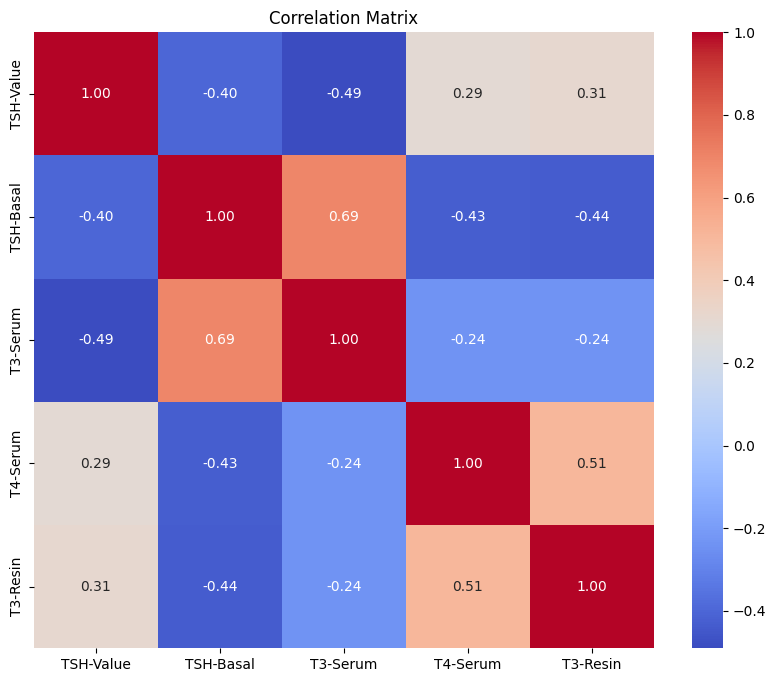

Selected Features:
Index(['T3-Resin', 'T4-Serum', 'TSH-Basal'], dtype='object')

Confusion Matrix:
[[28  0  0]
 [ 0  8  0]
 [ 1  0  6]]

Classification Report:
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00         8
           3       1.00      0.86      0.92         7

    accuracy                           0.98        43
   macro avg       0.99      0.95      0.97        43
weighted avg       0.98      0.98      0.98        43


Accuracy: 0.98


In [ ]:
#Chapter 4: Feature Selection
#4.4: Correlation-Based Method (With Visualization)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv'

# Assuming you have labeled the columns as follows
columns = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=columns)

# Separate features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate correlation coefficients between features and target
correlations = X_train.apply(lambda x: x.corr(y_train))

# Select the top-n features based on correlation
num_features_to_select = 3  # You can adjust this based on your requirements
selected_features = correlations.abs().nlargest(num_features_to_select).index

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Display the selected features
print("Selected Features:")
print(selected_features)

# Train a Naive Bayes classifier on the selected features
nb_classifier = GaussianNB()
nb_classifier.fit(X_train[selected_features], y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test[selected_features])

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix and accuracy
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the accuracy
print(f"\nAccuracy: {accuracy:.2f}")


# Supervised Learning

In [ ]:
#Chapter 5: Supervised Learning
#5.1: Random Forest Classifier (RFC)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# GitHub raw URL for the CSV file
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/new-thyroid.csv'

# Assuming you have labeled the columns as follows
columns = ['TSH-Value', 'TSH-Basal', 'T3-Serum', 'T4-Serum', 'T3-Resin', 'Target']

# Read the dataset into a DataFrame with custom column names
df = pd.read_csv(url, header=None, names=columns)

# Separate features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier with specified number of estimators and random state
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [ ]:
from sklearn.metrics import recall_score

# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, y_pred, average='weighted')
print(f"Sensitivity: {sensitivity:.2f}")


Sensitivity: 1.00


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate specificity for a multi-class classification
conf_matrix = confusion_matrix(y_test, y_pred)
num_classes = len(conf_matrix)

specificities = []

for i in range(num_classes):
    true_negative = sum(conf_matrix[j, k] for j in range(num_classes) if j != i for k in range(num_classes) if k != i)
    false_positive = sum(conf_matrix[j, i] for j in range(num_classes) if j != i)

    specificity_i = true_negative / (true_negative + false_positive)
    specificities.append(specificity_i)

# Take the average specificity across all classes
average_specificity = sum(specificities) / num_classes
print(f"Specificity: {average_specificity:.2f}")




Specificity: 1.00


In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")


F1 Score: 1.00


# Optimization

## cross-validation on nb_classifier from Correlation-Based Method

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(nb_classifier, X[selected_features], y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)

# Print the average cross-validation score
print("\nAverage Cross-Validation Score:")
print(cv_scores.mean())

Cross-Validation Scores:
[0.90697674 0.90697674 1.         1.         0.95348837]

Average Cross-Validation Score:
0.9534883720930232


## find the best var_smoothing value for nb_classifier

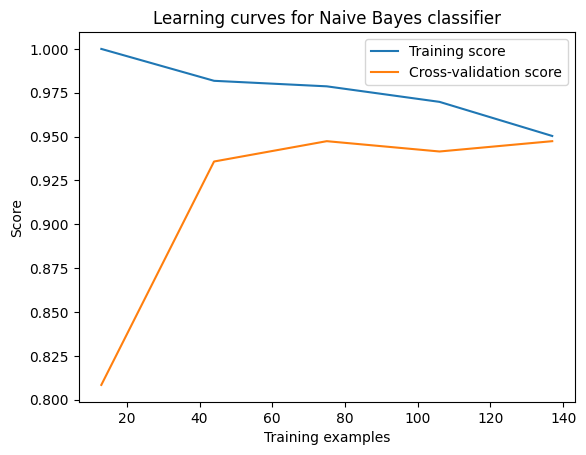


Best Parameters for Naive Bayes:  {'var_smoothing': 0.0023101297000831605}
Best Score for Naive Bayes:  0.9648739495798321


In [ ]:
from sklearn.model_selection import learning_curve, GridSearchCV
import numpy as np

# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(nb_classifier, X_train[selected_features], y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.title('Learning curves for Naive Bayes classifier')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Define the parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Perform grid search on Naive Bayes
grid_search_nb = GridSearchCV(nb_classifier, param_grid_nb, cv=5)
grid_search_nb.fit(X_train[selected_features], y_train)

# Print the best parameters and the best score
print("\nBest Parameters for Naive Bayes: ", grid_search_nb.best_params_)
print("Best Score for Naive Bayes: ", grid_search_nb.best_score_)

## train nb_classifier2 with the best var_smoothing value

In [ ]:
# Train a Naive Bayes classifier on the selected features with the optimal var_smoothing
nb_classifier2 = GaussianNB(var_smoothing=0.0023101297000831605)
nb_classifier2.fit(X_train[selected_features], y_train)

# Make predictions on the test data
y_pred = nb_classifier2.predict(X_test[selected_features])

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix and accuracy
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the accuracy
print(f"\nAccuracy: {accuracy:.2f}")


Confusion Matrix:
[[28  0  0]
 [ 0  8  0]
 [ 1  0  6]]

Classification Report:
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00         8
           3       1.00      0.86      0.92         7

    accuracy                           0.98        43
   macro avg       0.99      0.95      0.97        43
weighted avg       0.98      0.98      0.98        43


Accuracy: 0.98


## cross-validation with nb_classifier2

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the Naive Bayes classifier with the optimal var_smoothing
scores = cross_val_score(nb_classifier2, X_train[selected_features], y_train, cv=5)

# Print the cross-validation scores and the average score
print("Cross-Validation Scores: ", scores)
print("Average Cross-Validation Score: ", scores.mean())

Cross-Validation Scores:  [0.97142857 1.         1.         0.94117647 0.91176471]
Average Cross-Validation Score:  0.9648739495798321
